### **Импорт данных из датасетов**


In [1]:
pip install python-docx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 kB 4.6 MB/s eta 0:00:00


In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm

In [3]:
# датасет фильмы с нетфликса
url_n_movies = 'https://raw.githubusercontent.com/gulshatkd/movies_research/main/n_movies.xlsx'

df_n_movies = pd.read_excel(url_n_movies)
df_n_movies.head(5)

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30.0,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...",177031.0
1,The Crown,(2016– ),TV-MA,58.0,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...",199885.0
2,Better Call Saul,(2015–2022),TV-MA,46.0,"Crime, Drama",8.9,The trials and tribulations of crial lawyer Ji...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...",501384.0
3,Cyberpunk: Edgerunners,(2022– ),TV-MA,24.0,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...",15413.0
4,The Sandman,(2022– ),TV-MA,45.0,"Drama, Fantasy, Horror",7.8,Upon escaping after decades of imprisonment by...,"['Tom Sturridge, ', 'Boyd Holbrook, ', 'Patton...",116358.0


In [4]:
# датасет 500 фильмов
url_500 = 'https://raw.githubusercontent.com/gulshatkd/movies_research/main/top-500-movies.csv'

df_500 = pd.read_csv(url_500)
df_500.head(5)

,rank,release_date,title,url,production_cost,domestic_gross,worldwide_gross,opening_weekend,mpaa,genre,theaters,runtime,year
0,1,2019-04-23,Avengers: Endgame,/movie/Avengers-Endgame-(2019)#tab=summary,400000000,858373000,2797800564,357115007.0,PG-13,Action,4662.0,181.0,2019.0
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,/movie/Pirates-of-the-Caribbean-On-Stranger-Ti...,379000000,241071802,1045713802,90151958.0,PG-13,Adventure,4164.0,136.0,2011.0
2,3,2015-04-22,Avengers: Age of Ultron,/movie/Avengers-Age-of-Ultron#tab=summary,365000000,459005868,1395316979,191271109.0,PG-13,Action,4276.0,141.0,2015.0
3,4,2015-12-16,Star Wars Ep. VII: The Force Awakens,/movie/Star-Wars-Ep-VII-The-Force-Awakens#tab=...,306000000,936662225,2064615817,247966675.0,PG-13,Adventure,4134.0,136.0,2015.0
4,5,2018-04-25,Avengers: Infinity War,/movie/Avengers-Infinity-War#tab=summary,300000000,678815482,2048359754,257698183.0,PG-13,Action,4474.0,156.0,2018.0


In [5]:
df_n_movies['title'] = df_n_movies['title'].str.strip()
df_500['title'] = df_500['title'].str.strip()

# Объединяем датасеты
merged_df = pd.merge(df_n_movies, df_500[['title', 'production_cost', 'domestic_gross', 'worldwide_gross', 'opening_weekend']], on='title')

# Вывод полученного датасета
merged_df.head(5)

,title,year,certificate,duration,genre,rating,description,stars,votes,production_cost,domestic_gross,worldwide_gross,opening_weekend
0,Avengers: Endgame,2019,PG-13,181.0,"Action, Adventure, Drama",8.4,NaN,"['Joe Russo', 'Robert Downey Jr.', 'Chris Evan...",1202898.0,400000000,858373000,2797800564,357115007.0
1,Pirates of the Caribbean: On Stranger Tides,2011,PG-13,136.0,"Action, Adventure, Fantasy",6.6,NaN,"['Johnny Depp', 'Penélope Cruz', 'Ian McShane'...",546569.0,379000000,241071802,1045713802,90151958.0
2,Avengers: Age of Ultron,2015,PG-13,141.0,"Action, Adventure, Sci-Fi",7.3,NaN,"['Robert Downey Jr.', 'Chris Evans', 'Mark Ruf...",894706.0,365000000,459005868,1395316979,191271109.0
3,Avengers: Infinity War,2018,PG-13,156.0,"Action, Adventure, Sci-Fi",8.4,NaN,"['Joe Russo', 'Robert Downey Jr.', 'Chris Hems...",1144636.0,300000000,678815482,2048359754,257698183.0
4,Justice League,2017,PG-13,121.0,"Action, Adventure, Fantasy",6.1,NaN,"['Ben Affleck', 'Gal Gadot', 'Jason Momoa', 'E...",467305.0,300000000,229024295,655945209,93842239.0


### **Предварительный анализ данных**

In [6]:
merged_df.columns

Index(['title', 'year', 'certificate', 'duration', 'genre', 'rating',
       'description', 'stars', 'votes', 'production_cost', 'domestic_gross',
       'worldwide_gross', 'opening_weekend'],
      dtype='object')

In [7]:
merged_df = merged_df.drop('description', axis=1)

In [8]:
# вывод количества пропусков в каждом столбце
merged_df.isnull().sum()

title               0
year                0
certificate         0
duration            4
genre               0
rating              0
stars               0
votes               0
production_cost     0
domestic_gross      0
worldwide_gross     0
opening_weekend    13
dtype: int64

In [9]:
merged_df = merged_df.dropna(subset=['duration'])

In [10]:
merged_df.isnull().sum()

title               0
year                0
certificate         0
duration            0
genre               0
rating              0
stars               0
votes               0
production_cost     0
domestic_gross      0
worldwide_gross     0
opening_weekend    12
dtype: int64

In [11]:
#merged_df.info()
merged_df.dropna().head(5)

,title,year,certificate,duration,genre,rating,stars,votes,production_cost,domestic_gross,worldwide_gross,opening_weekend
0,Avengers: Endgame,2019,PG-13,181.0,"Action, Adventure, Drama",8.4,"['Joe Russo', 'Robert Downey Jr.', 'Chris Evan...",1202898.0,400000000,858373000,2797800564,357115007.0
1,Pirates of the Caribbean: On Stranger Tides,2011,PG-13,136.0,"Action, Adventure, Fantasy",6.6,"['Johnny Depp', 'Penélope Cruz', 'Ian McShane'...",546569.0,379000000,241071802,1045713802,90151958.0
2,Avengers: Age of Ultron,2015,PG-13,141.0,"Action, Adventure, Sci-Fi",7.3,"['Robert Downey Jr.', 'Chris Evans', 'Mark Ruf...",894706.0,365000000,459005868,1395316979,191271109.0
3,Avengers: Infinity War,2018,PG-13,156.0,"Action, Adventure, Sci-Fi",8.4,"['Joe Russo', 'Robert Downey Jr.', 'Chris Hems...",1144636.0,300000000,678815482,2048359754,257698183.0
4,Justice League,2017,PG-13,121.0,"Action, Adventure, Fantasy",6.1,"['Ben Affleck', 'Gal Gadot', 'Jason Momoa', 'E...",467305.0,300000000,229024295,655945209,93842239.0


In [12]:
data_description = merged_df.describe().to_dict()

# Создаем новый DataFrame из словаря
description_df = pd.DataFrame(data_description)

description_df

,duration,rating,votes,production_cost,domestic_gross,worldwide_gross,opening_weekend
count,471.000000,471.000000,4.710000e+02,4.710000e+02,4.710000e+02,4.710000e+02,4.590000e+02
mean,122.284501,6.741189,3.550676e+05,1.496877e+08,1.656764e+08,4.651782e+08,5.363088e+07
std,22.561211,0.839859,3.476601e+05,4.711066e+07,1.353987e+08,3.793215e+08,4.478370e+07
min,76.000000,4.900000,1.040000e+04,9.100000e+07,0.000000e+00,0.000000e+00,1.166160e+05
25%,105.000000,6.200000,1.384515e+05,1.100000e+08,7.194183e+07,2.151992e+08,2.394470e+07
50%,121.000000,6.700000,2.508260e+05,1.440000e+08,1.321772e+08,3.739940e+08,4.103994e+07
75%,136.000000,7.400000,4.606625e+05,1.780000e+08,2.102457e+08,6.143943e+08,6.853296e+07
max,210.000000,9.000000,2.758250e+06,4.000000e+08,8.583730e+08,2.910371e+09,3.571150e+08


In [13]:
columns_to_convert = ['votes', 'production_cost', 'domestic_gross', 'worldwide_gross', 'opening_weekend', '']

# Устанавливаем формат для отображения
pd.options.display.float_format = '{:.0f}'.format

In [14]:
unique_titles_count = merged_df['title'].nunique()
print(f"Количество уникальных названий: {unique_titles_count}")

Количество уникальных названий: 408


In [15]:
# Удаляем дубликаты в исходном DataFrame
merged_df.drop_duplicates(subset='title', inplace=True)

#Удалили пропуски
merged_df = merged_df[merged_df['title'] != 'The Gray Man']
merged_df = merged_df[merged_df['title'] != 'Turning Red']
merged_df = merged_df[merged_df['title'] != 'Red Notice']
merged_df = merged_df[merged_df['title'] != '6 Underground']
merged_df = merged_df[merged_df['title'] != 'The Irishman']
merged_df = merged_df[merged_df['title'] != 'The Midnight Sky']

merged_df.loc[merged_df['opening_weekend'].isnull()]

<ipython-input-15-d8f83236ac18>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df.drop_duplicates(subset='title', inplace=True)


,title,year,certificate,duration,genre,rating,stars,votes,production_cost,domestic_gross,worldwide_gross,opening_weekend
86,Mulan,1998,G,115,"Animation, Adventure, Comedy",8,"['Barry Cook', 'g-Na Wen', 'Eddie Murphy', 'BD...",303102,200000000,0,69965374,NaN
88,The Tomorrow War,2021,PG-13,140,"Action, Adventure, Drama",6,"['Chris Pratt', 'Yvonne Strahovski', 'J.K. Sim...",217389,200000000,0,19220000,NaN
339,Outlaw King,2018,R,117,"Action, Biography, Drama",7,"['Chris Pine', 'Stephen Dillane', 'Rebecca Rob...",77102,120000000,0,0,NaN
340,Emancipation,2022,R,132,"Action, Thriller",6,"['Will Smith', 'Ben Foster', 'Charmaine Bingwa...",24315,120000000,0,0,NaN
346,Triple Frontier,2019,R,125,"Action, Thriller",6,"['Ben Affleck', 'Oscar Isaac', 'Charlie Hunnam...",138369,115000000,0,0,NaN


In [16]:
merged_df.reset_index(inplace=True)
merged_df.index = merged_df.index + 1

# Удаляем столбец со старыми индексами
merged_df.drop('index', axis=1, inplace=True)

In [17]:
#заполняем пропуски
merged_df.at[69, 'opening_weekend'] = 22800000
merged_df.at[70, 'opening_weekend'] = 8100000
merged_df.at[71, 'opening_weekend'] = 4200000
merged_df.at[118, 'opening_weekend'] = 3800000

merged_df.at[148, 'opening_weekend'] = 120000
merged_df.at[197, 'opening_weekend'] = 1500000
merged_df.at[379, 'opening_weekend'] = 22000

condition = (merged_df['opening_weekend'] == 0)

# Удаление строк, соответствующих условию
merged_df = merged_df[~condition]

In [18]:
# Создаем фильтр для определенных строк
filter_condition = merged_df['title'] == 'Outlaw King'

# Удаляем строки, удовлетворяющие условию
merged_df.drop(merged_df[filter_condition].index, inplace=True)
filter_condition = merged_df['title'] == 'Emancipation'


# Удаляем строки, удовлетворяющие условию
merged_df.drop(merged_df[filter_condition].index, inplace=True)

filter_condition = merged_df['title'] == 'Triple Frontier'


# Удаляем строки, удовлетворяющие условию
merged_df.drop(merged_df[filter_condition].index, inplace=True)

### **Добавление переменных наличие премии Оскар и наличие премии Золотой Глобус в датасет**

In [19]:
df_oscar = pd.read_csv('https://raw.githubusercontent.com/gulshatkd/movies_research/main/the_oscar_award.csv')
df_globe = pd.read_csv('https://raw.githubusercontent.com/gulshatkd/movies_research/main/golden_globe_awards.csv')

df_oscar.head(5)

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False


In [20]:
import ast  # Модуль для преобразования строки в структуру данных Python

# Преобразуйте значения в столбце "stars" из строк в списки
merged_df['stars'] = merged_df['stars'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])

# Создайте пустую колонку 'oscar' со значениями по умолчанию 0
merged_df['oscar'] = 0

# Пройдите по каждой строке в merged_df
for index, row in merged_df.iterrows():
    # Получите список актеров из столбца 'stars' текущей строки
    actors = row['stars']

    # Проверьте, есть ли хотя бы один награжденный актер в списке
    if df_oscar[(df_oscar['name'].isin(actors)) & (df_oscar['winner'] == True)].shape[0] > 0:
        merged_df.at[index, 'oscar'] = 1

In [21]:
df_globe.head(5)

,year_film,year_award,ceremony,category,nominee,film,win
0,1943,1944,1,Best Performance by an Actress in a Supporting...,Katina Paxinou,For Whom The Bell Tolls,True
1,1943,1944,1,Best Performance by an Actor in a Supporting R...,Akim Tamiroff,For Whom The Bell Tolls,True
2,1943,1944,1,Best Director - Motion Picture,Henry King,The Song Of Bernadette,True
3,1943,1944,1,Picture,The Song Of Bernadette,NaN,True
4,1943,1944,1,Actress In A Leading Role,Jennifer Jones,The Song Of Bernadette,True


In [22]:

# Создайте пустую колонку 'oscar' со значениями по умолчанию 0
merged_df['golden globe'] = 0

# Пройдите по каждой строке в merged_df
for index, row in merged_df.iterrows():
    # Получите список актеров из столбца 'stars' текущей строки
    actors = row['stars']

    # Проверьте, есть ли хотя бы один номинированный актер в списке
    if df_globe[(df_globe['nominee'].isin(actors)) & (df_globe['win'] == True)].shape[0] > 0:
        merged_df.at[index, 'golden globe'] = 1

merged_df.head(5)

,title,year,certificate,duration,genre,rating,stars,votes,production_cost,domestic_gross,worldwide_gross,opening_weekend,oscar,golden globe
1,Avengers: Endgame,2019,PG-13,181,"Action, Adventure, Drama",8,"[Joe Russo, Robert Downey Jr., Chris Evans, Ma...",1202898,400000000,858373000,2797800564,357115007,0,1
2,Pirates of the Caribbean: On Stranger Tides,2011,PG-13,136,"Action, Adventure, Fantasy",7,"[Johnny Depp, Penélope Cruz, Ian McShane, Geof...",546569,379000000,241071802,1045713802,90151958,1,1
3,Avengers: Age of Ultron,2015,PG-13,141,"Action, Adventure, Sci-Fi",7,"[Robert Downey Jr., Chris Evans, Mark Ruffalo,...",894706,365000000,459005868,1395316979,191271109,0,1
4,Avengers: Infinity War,2018,PG-13,156,"Action, Adventure, Sci-Fi",8,"[Joe Russo, Robert Downey Jr., Chris Hemsworth...",1144636,300000000,678815482,2048359754,257698183,0,1
5,Justice League,2017,PG-13,121,"Action, Adventure, Fantasy",6,"[Ben Affleck, Gal Gadot, Jason Momoa, Ezra Mil...",467305,300000000,229024295,655945209,93842239,0,1


In [23]:
df_deflator = pd.read_excel('https://raw.githubusercontent.com/gulshatkd/movies_research/main/inflation_deflyator_USA.xlsx')

df_deflator.head(5)

,year,deflyator
0,1960,16
1,1961,16
2,1962,16
3,1963,16
4,1964,17


In [24]:
print(merged_df[['year']].dtypes)
print(df_deflator[['year']].dtypes)

year    object
dtype: object
year    int64
dtype: object


In [25]:
# Очистка столбца 'year' от некорректных значений
merged_df['year'] = merged_df['year'].str.extract('(\d+)').astype(float)

#Смотрим в каких рядах в значении год стоит Nan
nan_rows = merged_df[merged_df['year'].isna()]
nan_rows

,title,year,certificate,duration,genre,rating,stars,votes,production_cost,domestic_gross,worldwide_gross,opening_weekend,oscar,golden globe
1,Avengers: Endgame,NaN,PG-13,181,"Action, Adventure, Drama",8,"[Joe Russo, Robert Downey Jr., Chris Evans, Ma...",1202898,400000000,858373000,2797800564,357115007,0,1


In [26]:
#Смотрим в каких рядах в значении год стоит Nan
nan_rows = merged_df[merged_df['year'].isna()]
nan_rows

,title,year,certificate,duration,genre,rating,stars,votes,production_cost,domestic_gross,worldwide_gross,opening_weekend,oscar,golden globe
1,Avengers: Endgame,NaN,PG-13,181,"Action, Adventure, Drama",8,"[Joe Russo, Robert Downey Jr., Chris Evans, Ma...",1202898,400000000,858373000,2797800564,357115007,0,1


In [27]:
# Находим индекс строки, соответствующей фильму "Avengers: Endgame"
index_avengers = merged_df[merged_df['title'] == 'Avengers: Endgame'].index

# Устанавливаем значение 2019 в столбце 'year' для найденного индекса
merged_df.loc[index_avengers, 'year'] = 2019

In [28]:
# Преобразование столбца 'year' в `merged_df` к типу int64
merged_df['year'] = merged_df['year'].astype(int)

In [29]:
# Объедините данные по столбцу 'year'
merged_df = pd.merge(merged_df, df_deflator, on='year', how='left')

# Выполните операцию деления и умножения
columns_to_adjust = ['production_cost', 'domestic_gross', 'worldwide_gross', 'opening_weekend']

for column in columns_to_adjust:
    merged_df[column] = (merged_df[column] / merged_df['deflyator']) * 100

# Удаляем временный столбец 'deflator'
merged_df = merged_df.drop(['deflyator'], axis=1)
merged_df.head(5)

,title,year,certificate,duration,genre,rating,stars,votes,production_cost,domestic_gross,worldwide_gross,opening_weekend,oscar,golden globe
0,Avengers: Endgame,2019,PG-13,181,"Action, Adventure, Drama",8,"[Joe Russo, Robert Downey Jr., Chris Evans, Ma...",1202898,372835648,800080134,2607799464,332863012,0,1
1,Pirates of the Caribbean: On Stranger Tides,2011,PG-13,136,"Action, Adventure, Fantasy",7,"[Johnny Depp, Penélope Cruz, Ian McShane, Geof...",546569,404199780,257100711,1115243505,96146178,1,1
2,Avengers: Age of Ultron,2015,PG-13,141,"Action, Adventure, Sci-Fi",7,"[Robert Downey Jr., Chris Evans, Mark Ruffalo,...",894706,365000000,459005868,1395316979,191271109,0,1
3,Avengers: Infinity War,2018,PG-13,156,"Action, Adventure, Sci-Fi",8,"[Joe Russo, Robert Downey Jr., Chris Hemsworth...",1144636,284643045,644067020,1943504527,244506652,0,1
4,Justice League,2017,PG-13,121,"Action, Adventure, Fantasy",6,"[Ben Affleck, Gal Gadot, Jason Momoa, Ezra Mil...",467305,291486031,222524609,637329551,91179006,0,1


### **Описательные статистики**

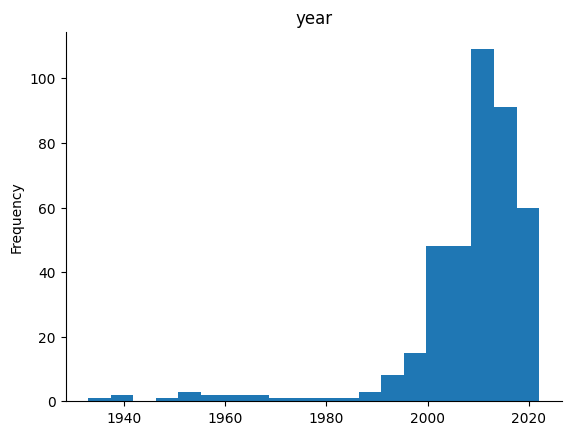

In [30]:
merged_df['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [31]:
# удаляю выбросы до 1980 года

# Рассчитайте межквартильный размах для колонки 'year'
Q1 = merged_df['year'].quantile(0.25)
Q3 = merged_df['year'].quantile(0.75)
IQR = Q3 - Q1

# Определите границы для определения выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Выделите строки с выбросами в колонке 'year'
outliers = merged_df[(merged_df['year'] < lower_bound) | (merged_df['year'] > upper_bound)]

# Удалите строки с выбросами из датасета
merged_df = merged_df[~((merged_df['year'] < lower_bound) | (merged_df['year'] > upper_bound))]

# Теперь в merged_df останутся только те строки, которые не являются выбросами в колонке 'year'

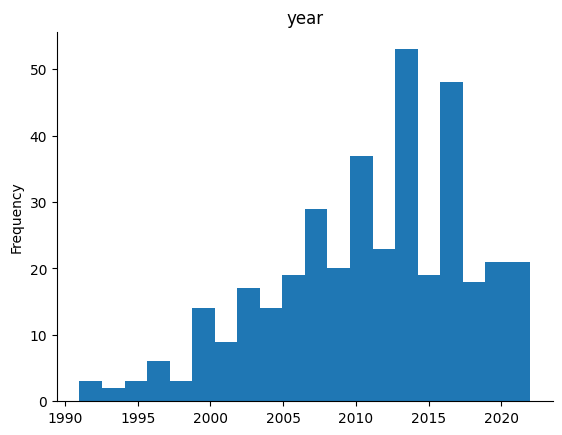

In [32]:
merged_df['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

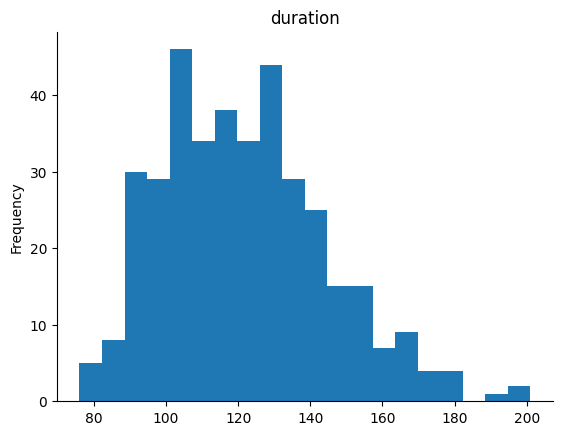

In [59]:
merged_df['duration'].plot(kind='hist', bins=20, title='duration')
plt.gca().spines[['top', 'right',]].set_visible(False)

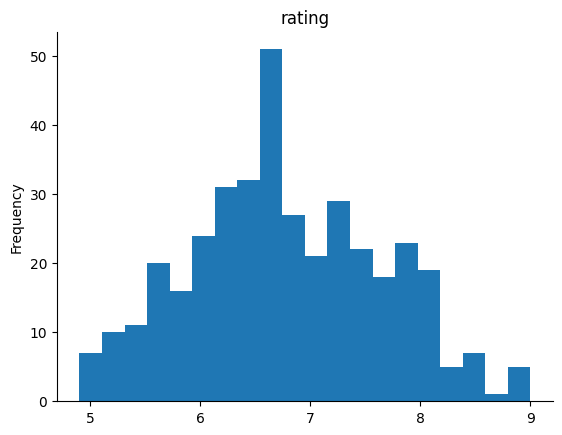

In [34]:
merged_df['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

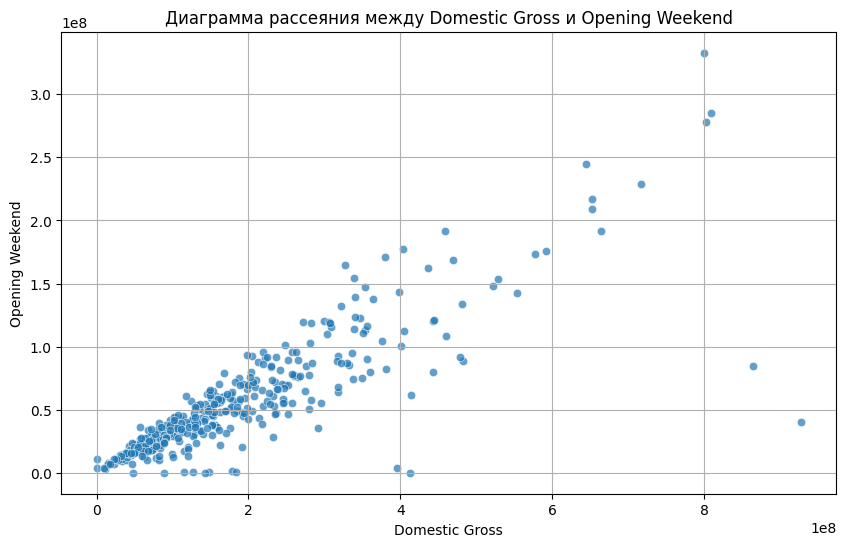

In [35]:
# Создайте диаграмму рассеяния
plt.figure(figsize=(10, 6))
sns.scatterplot(x='domestic_gross', y='opening_weekend', data=merged_df, alpha=0.7)

# Настройте отображение
plt.title('Диаграмма рассеяния между Domestic Gross и Opening Weekend')
plt.xlabel('Domestic Gross')
plt.ylabel('Opening Weekend')
plt.grid(True)

# Покажите диаграмму
plt.show()

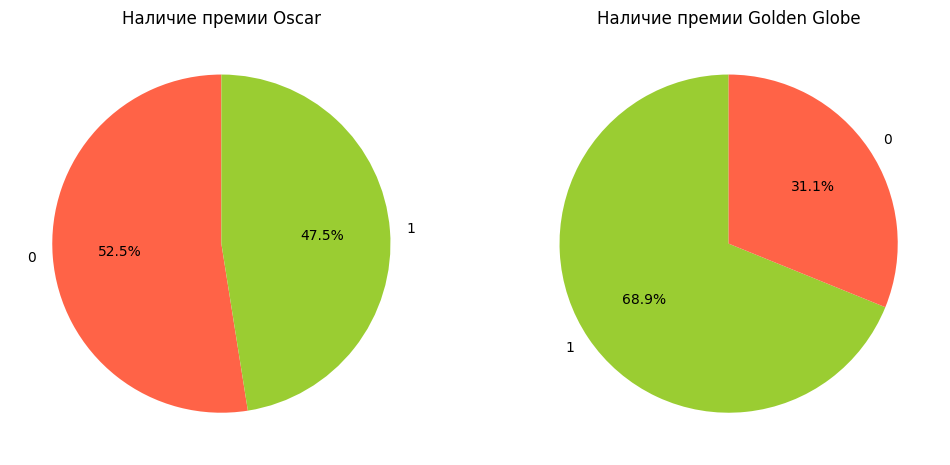

In [36]:
# Создайте фигуру для двух пай-чартов
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Пай-чарт для колонки 'oscar'
oscar_counts = merged_df['oscar'].value_counts()
colors_oscar = ['tomato', 'yellowgreen']  # Красный для 0, зеленый для 1
axes[0].pie(oscar_counts, labels=oscar_counts.index, autopct='%1.1f%%', startangle=90, colors=colors_oscar)
axes[0].set_title('Наличие премии Oscar')

# Пай-чарт для колонки 'golden_globe'
golden_globe_counts = merged_df['golden globe'].value_counts()
colors_gg = ['yellowgreen', 'tomato']  # Красный для 0, зеленый для 1
axes[1].pie(golden_globe_counts, labels=golden_globe_counts.index, autopct='%1.1f%%', startangle=90, colors=colors_gg)
axes[1].set_title('Наличие премии Golden Globe')

# Показать пай-чарты
plt.show()

<ipython-input-37-421ea9958c1e>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.corr()


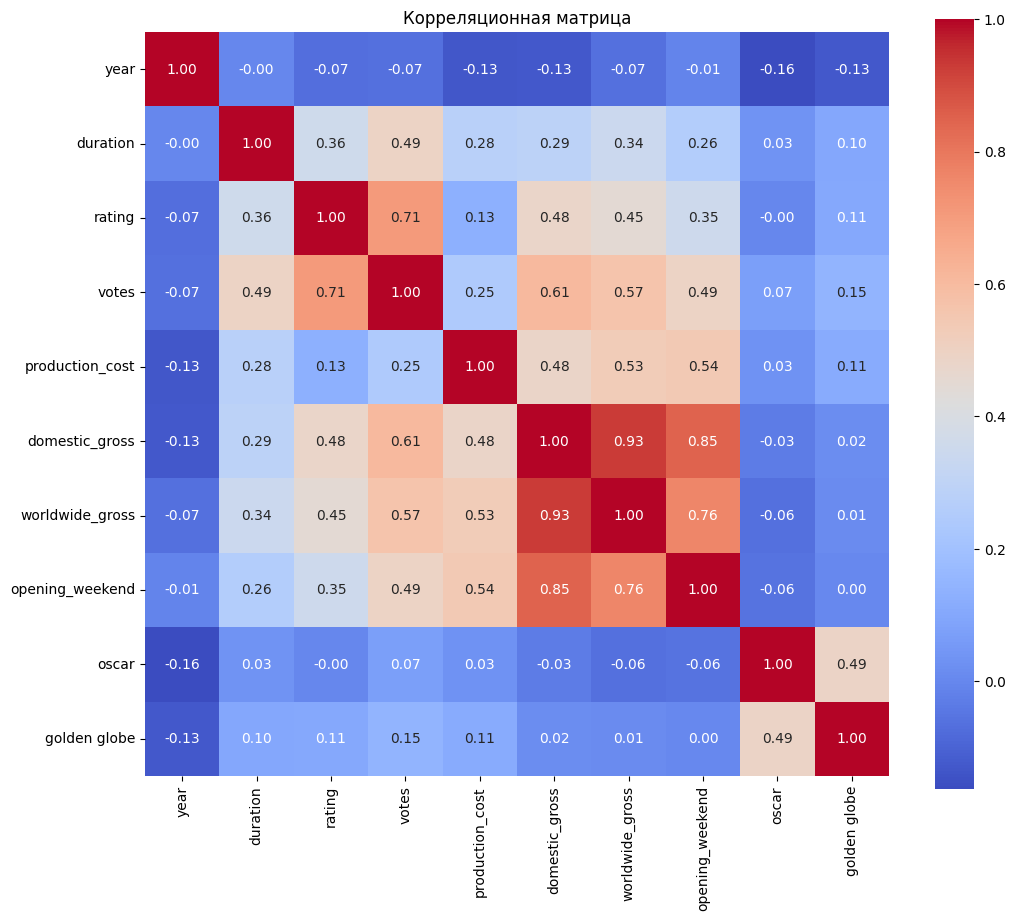

In [37]:
# корр матрицу строю

# Рассчитайте полную корреляционную матрицу
correlation_matrix = merged_df.corr()

# Создайте фигуру и оси для графика
plt.figure(figsize=(12, 10))

# Постройте тепловую карту корреляционной матрицы с помощью seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)

# Настройте отображение
plt.title('Корреляционная матрица')
plt.show()

### **Преобразование переменных oscar, golden_globe, certificate в дамми-переменные**

In [38]:
# Создайте копию датасета
new_df = merged_df.copy()

# Удалите указанные колонки
columns_to_drop = ['title', 'votes', 'domestic_gross', 'stars', 'year','genre']
new_df = new_df.drop(columns=columns_to_drop)

# Теперь new_df - это копия merged_df без указанных колонок
new_df.head(5)

,certificate,duration,rating,production_cost,worldwide_gross,opening_weekend,oscar,golden globe
0,PG-13,181,8,372835648,2607799464,332863012,0,1
1,PG-13,136,7,404199780,1115243505,96146178,1,1
2,PG-13,141,7,365000000,1395316979,191271109,0,1
3,PG-13,156,8,284643045,1943504527,244506652,0,1
4,PG-13,121,6,291486031,637329551,91179006,0,1


In [39]:
#проверяем пропуски
new_df.isnull().sum()

certificate        0
duration           0
rating             0
production_cost    0
worldwide_gross    0
opening_weekend    0
oscar              0
golden globe       0
dtype: int64

In [40]:
# Преобразование категориальной переменной в дамми-переменные
dummy_certificate = pd.get_dummies(new_df['certificate'], prefix='certificate')

# Объединение полученных дамми-переменных с исходным датасетом
new_df = pd.concat([new_df, dummy_certificate], axis=1)

# Удаление исходного столбца 'certificate'
new_df = new_df.drop('certificate', axis=1)
new_df = new_df.drop('certificate_TV-MA', axis=1)

### **Регрессионная модель, включающая dummy-переменную (certificate)**

In [41]:
y = new_df['worldwide_gross']

#add constant to predictor variables
x = sm.add_constant(new_df[['rating', 'production_cost', 'opening_weekend',
                        'oscar', 'golden globe', 'certificate_G', 'certificate_PG',
                        'certificate_PG-13', 'certificate_R']])
# Устанавливаем формат для отображения
pd.options.display.float_format = '{:.0f}'.format

#fit linear regression
model = sm.OLS (y, x). fit ()
#view model summary
print(model. summary ())

                            OLS Regression Results                            
Dep. Variable:        worldwide_gross   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     76.52
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           7.22e-79
Time:                        16:33:09   Log-Likelihood:                -7861.4
No. Observations:                 379   AIC:                         1.574e+04
Df Residuals:                     369   BIC:                         1.578e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.084e+09   2.87e+0

In [42]:
from docx import Document
doc = Document()

# Convert the ANOVA table to a Pandas DataFrame
anova_table = pd.DataFrame(model.summary().tables[0])
# The ANOVA table is usually the first table in the summary (index 0)

# Add the ANOVA table to the Word document
table = doc.add_table(anova_table.shape[0], anova_table.shape[1])
for i in range(anova_table.shape[0]):
    for j in range(anova_table.shape[1]):
        table.cell(i, j).text = str(anova_table.iloc[i, j])

# Save the Word document
doc.save('ANOVA_Table.docx')

### **Регрессионная модель без dummy-переменной (certificate)**



In [43]:
# Модель без дамми

y = new_df['worldwide_gross']

#add constant to predictor variables
x = sm.add_constant(new_df[['rating', 'production_cost', 'opening_weekend',
                        'oscar', 'golden globe']])
# Устанавливаем формат для отображения
pd.options.display.float_format = '{:.0f}'.format

#fit linear regression
model_no_dummy = sm.OLS (y, x). fit ()
#view model summary
print(model_no_dummy. summary ())

                            OLS Regression Results                            
Dep. Variable:        worldwide_gross   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     135.1
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           1.94e-81
Time:                        16:33:09   Log-Likelihood:                -7865.1
No. Observations:                 379   AIC:                         1.574e+04
Df Residuals:                     373   BIC:                         1.577e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -7.544e+08   1.17e+08     

In [44]:
import pandas as pd


# Создайте два новых датасета на основе условия
df_less_than_150m = new_df[new_df['production_cost'] < 150000000]
df_greater_than_150m = new_df[new_df['production_cost'] > 150000000]


### **Регрессионная модель для выборки с бюджетом меньше 150 млн долларов**

In [45]:
y1 = df_less_than_150m ['worldwide_gross']

#add constant to predictor variables
x1 = sm.add_constant(df_less_than_150m[['rating', 'production_cost', 'opening_weekend',
                        'oscar', 'golden globe',  'certificate_G', 'certificate_PG',
                        'certificate_PG-13', 'certificate_R']])
# Устанавливаем формат для отображения
pd.options.display.float_format = '{:.0f}'.format

#fit linear regression
model1 = sm.OLS (y1, x1). fit ()
#view model summary
print(model1. summary ())

                            OLS Regression Results                            
Dep. Variable:        worldwide_gross   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     42.37
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           3.08e-36
Time:                        16:33:09   Log-Likelihood:                -3519.4
No. Observations:                 174   AIC:                             7057.
Df Residuals:                     165   BIC:                             7085.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -4.624e+08   1.02e+0

### **Регрессионная модель для выборки с бюджетом больше 150 млн долларов**

In [46]:
y2 = df_greater_than_150m ['worldwide_gross']

#add constant to predictor variables
x2 = sm.add_constant(df_greater_than_150m[['rating', 'production_cost', 'opening_weekend',
                        'oscar', 'golden globe',  'certificate_G', 'certificate_PG',
                        'certificate_PG-13', 'certificate_R']])
# Устанавливаем формат для отображения
pd.options.display.float_format = '{:.0f}'.format

#fit linear regression
model2 = sm.OLS (y2, x2). fit ()
#view model summary
print(model2. summary ())

                            OLS Regression Results                            
Dep. Variable:        worldwide_gross   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     34.62
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           8.29e-36
Time:                        16:33:09   Log-Likelihood:                -4250.6
No. Observations:                 203   AIC:                             8521.
Df Residuals:                     193   BIC:                             8554.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.396e+09   3.94e+0

### **ТЕСТ ЧОУ**


In [47]:
RSS0 = model_no_dummy.ssr
RSS1 = model1.ssr
RSS2= model2.ssr

In [48]:
test_chow_chis = (RSS0-(RSS1+RSS2))/(5+1)
test_chow_zn = (RSS1+RSS2)/(379 - 2*(5+1))

test_chow = test_chow_chis/test_chow_zn

print('F-crit = 1.83 ', 'F-расчетное = ')
print(round(test_chow, 3))
print('Полученное значение F-статистики превышает критическое при любом разумном уровне значимости, следовательно, нулевая гипотеза отвергается, и имеет смысл оценивать отдельные регрессии для среднебюджетных и высокобюджетных фильмов')

F-crit = 1.83  F-расчетное = 
3.987
Полученное значение F-статистики превышает критическое при любом разумном уровне значимости, следовательно, нулевая гипотеза отвергается, и имеет смысл оценивать отдельные регрессии для среднебюджетных и высокобюджетных фильмов


## **Adjusted ROI**

In [49]:
df_less_than_150m['ROI'] = (df_less_than_150m['worldwide_gross'] - df_less_than_150m['production_cost'])/df_less_than_150m['production_cost']
df_less_than_150m.head(5)

<ipython-input-49-dfdb56ee4ca3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_less_than_150m['ROI'] = (df_less_than_150m['worldwide_gross'] - df_less_than_150m['production_cost'])/df_less_than_150m['production_cost']


,duration,rating,production_cost,worldwide_gross,opening_weekend,oscar,golden globe,certificate_G,certificate_PG,certificate_PG-13,certificate_R,ROI
136,156,8,145286260,350201987,36111273,0,1,0,0,1,0,1
147,113,6,136481032,412141571,105663,0,1,0,0,1,0,2
148,111,6,147065573,276037478,26677254,0,0,0,0,1,0,1
150,142,7,147686255,475697688,54666193,0,0,0,0,1,0,2
153,103,7,139813368,1347038679,121417059,0,0,0,1,0,0,9


In [50]:
df_greater_than_150m['ROI'] = (df_greater_than_150m['worldwide_gross'] - df_greater_than_150m['production_cost'])/df_greater_than_150m['production_cost']
df_greater_than_150m.head(5)

<ipython-input-50-af7d7e537923>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_greater_than_150m['ROI'] = (df_greater_than_150m['worldwide_gross'] - df_greater_than_150m['production_cost'])/df_greater_than_150m['production_cost']


,duration,rating,production_cost,worldwide_gross,opening_weekend,oscar,golden globe,certificate_G,certificate_PG,certificate_PG-13,certificate_R,ROI
0,181,8,372835648,2607799464,332863012,0,1,0,0,1,0,6
1,136,7,404199780,1115243505,96146178,1,1,0,0,1,0,2
2,141,7,365000000,1395316979,191271109,0,1,0,0,1,0,3
3,156,8,284643045,1943504527,244506652,0,1,0,0,1,0,6
4,121,6,291486031,637329551,91179006,0,1,0,0,1,0,1


In [51]:
# Расчет количества фильмов в каждой категории ROI
num_flops = len(df_greater_than_150m[df_greater_than_150m['ROI'] < 1])
num_barely_breaks_even = len(df_greater_than_150m[(df_greater_than_150m['ROI'] >= 1) & (df_greater_than_150m['ROI'] < 1.5)])
num_moderately_successful = len(df_greater_than_150m[(df_greater_than_150m['ROI'] >= 1.5) & (df_greater_than_150m['ROI'] < 2.5)])
num_hugely_successful = len(df_greater_than_150m[df_greater_than_150m['ROI'] > 2.5])

# Расчет процента для каждой категории ROI
total_films = len(df_greater_than_150m)
percent_flops = (num_flops / total_films) * 100
percent_barely_breaks_even = (num_barely_breaks_even / total_films) * 100
percent_moderately_successful = (num_moderately_successful / total_films) * 100
percent_hugely_successful = (num_hugely_successful / total_films) * 100

# Вывод результатов
print("Процент фильмов с ROI < 1 (Box office flop):", percent_flops)
print("Процент фильмов с ROI между 1 и 1.5 (Barely breaks even):", percent_barely_breaks_even)
print("Процент фильмов с ROI между 1.5 и 2.5 (Moderately successful):", percent_moderately_successful)
print("Процент фильмов с ROI > 2.5 (Hugely Successful):", percent_hugely_successful)


Процент фильмов с ROI < 1 (Box office flop): 31.03448275862069
Процент фильмов с ROI между 1 и 1.5 (Barely breaks even): 11.822660098522167
Процент фильмов с ROI между 1.5 и 2.5 (Moderately successful): 19.704433497536947
Процент фильмов с ROI > 2.5 (Hugely Successful): 37.4384236453202


In [52]:
# Расчет количества фильмов в каждой категории ROI
num_flops = len(df_less_than_150m[df_less_than_150m['ROI'] < 1])
num_barely_breaks_even = len(df_less_than_150m[(df_less_than_150m['ROI'] >= 1) & (df_less_than_150m['ROI'] < 1.5)])
num_moderately_successful = len(df_less_than_150m[(df_less_than_150m['ROI'] >= 1.5) & (df_less_than_150m['ROI'] < 2.5)])
num_hugely_successful = len(df_less_than_150m[df_less_than_150m['ROI'] > 2.5])

# Расчет процента для каждой категории ROI
total_films = len(df_less_than_150m)
percent_flops = (num_flops / total_films) * 100
percent_barely_breaks_even = (num_barely_breaks_even / total_films) * 100
percent_moderately_successful = (num_moderately_successful / total_films) * 100
percent_hugely_successful = (num_hugely_successful / total_films) * 100

# Вывод результатов
print("Процент фильмов с ROI < 1 (Box office flop):", percent_flops)
print("Процент фильмов с ROI между 1 и 1.5 (Barely breaks even):", percent_barely_breaks_even)
print("Процент фильмов с ROI между 1.5 и 2.5 (Moderately successful):", percent_moderately_successful)
print("Процент фильмов с ROI > 2.5 (Hugely Successful):", percent_hugely_successful)

Процент фильмов с ROI < 1 (Box office flop): 32.18390804597701
Процент фильмов с ROI между 1 и 1.5 (Barely breaks even): 14.942528735632186
Процент фильмов с ROI между 1.5 и 2.5 (Moderately successful): 22.413793103448278
Процент фильмов с ROI > 2.5 (Hugely Successful): 30.45977011494253


In [53]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [60]:
df_greater_than_150m.to_csv('data_high.csv')
!cp data_high.csv "drive/My Drive/"

In [61]:
df_less_than_150m.to_csv('data_medium.csv')
!cp data_medium.csv "drive/My Drive/"